In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn functions
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, f1_score, accuracy_score, classification_report, recall_score

# Importing data sampling methods
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection

# Imports for second dataset 
from sklearn.cluster import KMeans
from geopy.distance import geodesic

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate
from tensorflow.keras.models import Model

# Dealing with the data

In [2]:
# Scales the column
def scale_the_column(dataframe, column_name, column_index):
    rob_scaler = RobustScaler()
    dataframe[f'scaled_{column_name}'] = rob_scaler.fit_transform(dataframe[column_name].values.reshape(-1, 1))
    dataframe.drop([column_name], axis=1, inplace=True)
    scaled_column = dataframe[f'scaled_{column_name}']
    return dataframe

# Undersampling with One Sided Selection
def undersampling(X_train, y_train):
    undersampling = OneSidedSelection(n_neighbors=3, n_seeds_S=200)
    X_train, y_train= undersampling.fit_resample(X_train, y_train)
    return X_train,y_train

# Oversampling with SMOTE
def oversampling_SMOTE(X_train, y_train):
    oversample = SMOTE(sampling_strategy='auto')
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    return X_train,y_train

# TODO: Rewrite want a more beautiful plot
def plot_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    plt.bar(unique, counts, color=['blue', 'red'])
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Distribution of Data Points')
    plt.xticks(unique, ['(0)', '(1)'])
    plt.show()

# Functions for prediction

In [3]:
def fit_and_predict(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train))
    pred = model.predict(X_test)
    return pred, model

In [4]:
# LOGISTIC REGRESSION
def logistic_reg_model(X_train, y_train, X_test):
    model = LogisticRegression(max_iter=100000)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

# KNN
def knn_model(X_train, y_train, X_test):
    model = KNN(n_neighbors=3)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

# SUPPORT VECTORE MACHINE
def SVM_model(X_train, y_train, X_test):
    model = SVC(kernel='linear', C=1.0, random_state = 42)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

# RANDOM FOREST CLASSIFIER
def RFC_model(X_train, y_train, X_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

# DECISION TREE CLASSIFIER
def DTC_model(X_train, y_train, X_test):
    model = DecisionTreeClassifier(random_state=42)
    pred, model = fit_and_predict(X_train, y_train, X_test, model)
    return pred, model

In [60]:
# SCORE BOARD
def print_score_board(X_train, y_train, X_test, y_test, model):

    # get model name and print
    if model == "svm":
        pred, classifier = SVM_model(X_train, y_train, X_test)
        print('===== {} ====='.format("SUPPORT VECTOR MACHINE"))
    elif model == "lr":
        pred, classifier = logistic_reg_model(X_train, y_train, X_test)
        print('===== {} ====='.format("LOGISTIC REGRESSION"))
    elif model == "knn":
        pred, classifier = knn_model(X_train, y_train, X_test)
        print('===== {} ====='.format("k-NEAREST NEIGHBORS MODEL"))
    elif model == "rfc":
        pred, classifier = RFC_model(X_train, y_train, X_test)
        print('===== {} ====='.format("RANDOM FOREST CLASSIFIER"))
    elif model == "dtc":
        pred, classifier = DTC_model(X_train, y_train, X_test)
        print('===== {} ====='.format("DECISION TREE CLASSIFIER"))


    classification = metrics.classification_report(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    print()
    print("Classification Report:" "\n", classification)
    print()
    auc_score = roc_auc_score(y_test, pred)
    print(f"AUC-ROC Score: {auc_score:.2f}")
    print()


    precisions.append(precision)
    auc_scores.append(auc_score)
    f_scores.append(f1score)

    '''confusion_matrix = metrics.confusion_matrix(y_test, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()'''

# Data Reading

In [6]:
df = pd.read_csv('card_transaction.v1.csv')
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [7]:
zip_df = pd.read_csv('zip_code_database.csv',usecols=['zip', 'latitude', 'longitude', 'irs_estimated_population'])
zip_df.tail()

,zip,latitude,longitude,irs_estimated_population
42730,99926,55.14,-131.49,1140
42731,99927,56.33,-133.61,48
42732,99928,55.45,-131.79,1530
42733,99929,56.41,-131.61,2145
42734,99950,55.34,-131.64,262


In [8]:
# Seperate target and fetures
X = df.drop('Is Fraud?', axis=1)
y = df['Is Fraud?']

In [9]:
#only use %50 of the data
X, _, y, _ = train_test_split(X, y, test_size=0.50, random_state = 42)

In [10]:
#to prevent unseen data leakage split data before process
X_train_org, X_test, y_train_org, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
print('X_train_shape: ', X_train_org.shape, '\nX_test_Shape: ', X_test.shape,'\ny_train_shape: ', y_train_org.shape, '\ny_test_shape: ' , y_test.shape)

X_train_shape:  (8535415, 14) 
X_test_Shape:  (3658035, 14) 
y_train_shape:  (8535415,) 
y_test_shape:  (3658035,)


In [11]:
# coverting type to category then convert  into numerical codes.
X_train_org['merchant_id'] = X_train_org['Merchant Name'].astype('category').cat.codes
X_train_org.drop(columns=['Merchant Name'], axis=1, inplace=True)
X_test['merchant_id'] = X_test['Merchant Name'].astype('category').cat.codes
X_test.drop(columns=['Merchant Name'], axis=1, inplace=True)

In [12]:
# strip dolar sign before numeric feature
X_train_org['Amount'] = X_train_org['Amount'].str.strip('$')
X_test['Amount'] = X_test['Amount'].str.strip('$')

In [13]:
#combining user and card feature
tmp_feature = X_train_org['User'].astype('str')
tmp_feature = tmp_feature + X_train_org['Card'].astype('str')
X_train_org['user_card'] = tmp_feature 


X_train_org.drop(["User"], axis=1, inplace=True)
X_train_org.drop(["Card"], axis=1, inplace=True)


tmp_feature = X_test['User'].astype('str')
tmp_feature = tmp_feature + X_test['Card'].astype('str')
X_test['user_card'] = tmp_feature 


X_test.drop(["User"], axis=1, inplace=True)
X_test.drop(["Card"], axis=1, inplace=True)

In [14]:
# coverting type to category then convert  into numerical codes.
X_train_org['user_card'] = X_train_org['user_card'].astype('category').cat.codes
X_test['user_card'] = X_test['user_card'].astype('category').cat.codes

In [15]:
# combining merchant city and merchant state features
tmp_feature = X_train_org['Merchant City'].astype('str')
tmp_feature = tmp_feature + X_train_org['Merchant State'].astype('str')
X_train_org['merhact_location'] = tmp_feature

X_train_org.drop(["Merchant City"], axis=1, inplace=True)
X_train_org.drop(["Merchant State"], axis=1, inplace=True)

tmp_feature = X_test['Merchant City'].astype('str')
tmp_feature = tmp_feature + X_test['Merchant State'].astype('str')
X_test['merhact_location'] = tmp_feature

X_test.drop(["Merchant City"], axis=1, inplace=True)
X_test.drop(["Merchant State"], axis=1, inplace=True)

In [16]:
# coverting type to category then convert  into numerical codes.
X_train_org['merhact_location'] = X_train_org['merhact_location'].astype('category').cat.codes
X_test['merhact_location'] = X_test['merhact_location'].astype('category').cat.codes

In [17]:
# coverting type to category then convert  into numerical codes.
X_train_org['MCC'] = X_train_org['MCC'].astype('category').cat.codes
X_test['MCC'] = X_test['MCC'].astype('category').cat.codes

In [18]:
# making timestamp from features year, month , dat and time
def timeEncoder(X):
        X_hm = X['Time'].str.split(':', expand=True)
        d = pd.to_datetime(dict(year=X['Year'], month=X['Month'], day=X['Day'], hour=X_hm[0], minute=X_hm[1])).astype('int64')
        return pd.DataFrame(d)

In [19]:
timestamp = timeEncoder(X_train_org[['Year', 'Month', 'Day', 'Time']])
X_train_org['Timestamp'] = timestamp
X_train_org.drop(["Year"], axis=1, inplace=True)
X_train_org.drop(["Month"], axis=1, inplace=True)
X_train_org.drop(["Day"], axis=1, inplace=True)
X_train_org.drop(["Time"], axis=1, inplace=True)

    
timestamp = timeEncoder(df[['Year', 'Month', 'Day', 'Time']])
X_test['Timestamp'] = timestamp
X_test.drop(["Year"], axis=1, inplace=True)
X_test.drop(["Month"], axis=1, inplace=True)
X_test.drop(["Day"], axis=1, inplace=True)
X_test.drop(["Time"], axis=1, inplace=True)

In [20]:
# change type from string to float 
X_train_org['Amount'] = X_train_org['Amount'].astype('float32')
X_test['Amount'] = X_test['Amount'].astype('float32')

In [21]:
# one hot encoding type of chip usage
X_train_org = pd.concat([X_train_org, pd.get_dummies(X_train_org[['Use Chip']], dtype='int')], axis=1)
X_train_org.drop(columns=['Use Chip'], axis=1, inplace=True)

X_test = pd.concat([X_test, pd.get_dummies(X_test[['Use Chip']], dtype='int')], axis=1)
X_test.drop(columns=['Use Chip'], axis=1, inplace=True)

In [22]:
# split ting error types
X_train_org['Errors?'] = X_train_org['Errors?'].map(lambda x: str(x).split(','))
X_test['Errors?'] = X_test['Errors?'].map(lambda x: str(x).split(','))

In [23]:
#one hot encoding errors types
exploded = X_train_org['Errors?'].explode()
raw_one_hot = pd.get_dummies(exploded, columns=['Errors?'])
tmp_df = raw_one_hot.groupby(raw_one_hot.index).sum()
X_train_org = pd.concat([X_train_org, tmp_df], axis=1) 
col_names = X_train_org.columns 
if '' in col_names or 'nan' in col_names: 
    X_train_org.drop(columns=['', 'nan'], axis=1, inplace=True)
X_train_org.drop(columns=['Errors?'], axis=1, inplace=True)

exploded = X_test['Errors?'].explode()
raw_one_hot = pd.get_dummies(exploded, columns=['Errors?'])
tmp_df = raw_one_hot.groupby(raw_one_hot.index).sum()
X_test = pd.concat([X_test, tmp_df], axis=1) 
col_names = X_test.columns 
if '' in col_names or 'nan' in col_names: 
    X_test.drop(columns=['', 'nan'], axis=1, inplace=True)
X_test.drop(columns=['Errors?'], axis=1, inplace=True)

In [24]:
# change column name same as data set
zip_df = zip_df.rename(columns={'zip': 'Zip'})

In [25]:
# merging zip data 
X_train_org = pd.merge(X_train_org, zip_df, how='left', on='Zip')
X_test = pd.merge(X_test, zip_df, how='left', on='Zip')

In [26]:
#combining latitude and longitude
X_train_org['TransactionLocation'] = list(zip(X_train_org['latitude'], X_train_org['longitude']))
X_test['TransactionLocation'] = list(zip(X_test['latitude'], X_test['longitude']))

In [27]:
# 40.80, -73.97 New York, NY ZIP Code 10025
cardholder_home = (40.80, -73.97)  

# Function to calculate distance between two points
def calculate_distance(transaction_location, cardholder_home):
    return geodesic(transaction_location, cardholder_home).kilometers



X_train_org['DistanceToHome'] = X_train_org['TransactionLocation'].apply(
    lambda x: -1 if pd.isna(x[0]) or pd.isna(x[1]) else calculate_distance(x, cardholder_home)
)

X_test['DistanceToHome'] = X_test['TransactionLocation'].apply(
    lambda x: -1 if pd.isna(x[0]) or pd.isna(x[1]) else calculate_distance(x, cardholder_home)
)

In [28]:
#dropping colums latitude longitude and TransactionLocation
X_train_org.drop(columns=['latitude'], axis=1, inplace=True)
X_train_org.drop(columns=['longitude'], axis=1, inplace=True)
X_train_org.drop(columns=['TransactionLocation'], axis=1, inplace=True)

X_test.drop(columns=['latitude'], axis=1, inplace=True)
X_test.drop(columns=['longitude'], axis=1, inplace=True)
X_test.drop(columns=['TransactionLocation'], axis=1, inplace=True)

In [29]:
# filling nan values
X_train_org.fillna({'irs_estimated_population': -1}, inplace=True)
X_test.fillna({'irs_estimated_population': -1}, inplace=True)

In [30]:
# coverting type to category then convert  into numerical codes.

X_train_org['Zip'] = X_train_org['Zip'].astype('category').cat.codes
X_test['Zip'] = X_test['Zip'].astype('category').cat.codes

In [31]:
#this loop is to encode the categorical values in your training data (X_train_org) to numerical indices that can be used as inputs to the embedding layers
for col in ['merchant_id', 'Zip', 'MCC', 'merhact_location', 'user_card']:
    # Create a mapping of unique values to indices
    unique_values = X_train_org[col].unique()
    value_to_index = {v: i for i, v in enumerate(unique_values)}
    X_train_org[col] = X_train_org[col].map(value_to_index)

In [32]:
X = X_train_org[['merchant_id', 'Zip', 'MCC', 'merhact_location', 'user_card']].values.astype(np.int32)

In [33]:
# embedding model for scaling large number of unique values, avoiding the high dimensionality of one-hot encoding
num_categories_merchant = X_train_org['merchant_id'].nunique()
num_categories_zip = X_train_org['Zip'].nunique()
num_categories_mcc = X_train_org['MCC'].nunique()
num_categories_merhact = X_train_org['merhact_location'].nunique()
num_categories_user_card = X_train_org['user_card'].nunique()

#  input layers for each categorical feature
input_merchant_id = Input(shape=(1,), name='merchant_id')
input_zip = Input(shape=(1,), name='Zip')
input_mcc = Input(shape=(1,), name='MCC')
input_merhact = Input(shape=(1,), name='merhact_location')
input_user_card = Input(shape=(1,), name='user_card')

# layer maps each category index to a dense vector of a specified dimension
embedding_merchant_id = Embedding(input_dim=num_categories_merchant, output_dim=10, name='embedding_merchant_id')(input_merchant_id)
embedding_zip = Embedding(input_dim=num_categories_zip, output_dim=10, name='embedding_zip')(input_zip)
embedding_mcc = Embedding(input_dim=num_categories_mcc, output_dim=10, name='embedding_mcc')(input_mcc)
embedding_merhact = Embedding(input_dim=num_categories_merhact, output_dim=10, name='embedding_merhact')(input_merhact)
embedding_user_card = Embedding(input_dim=num_categories_user_card, output_dim=10, name='embedding_user_card')(input_user_card)

#  flattened into 1D tensors
flatten_merchant_id = Flatten()(embedding_merchant_id)
flatten_zip = Flatten()(embedding_zip)
flatten_mcc = Flatten()(embedding_mcc)
flatten_merhact = Flatten()(embedding_merhact)
flatten_user_card = Flatten()(embedding_user_card)

# oncatenated into a single vector
concatenated = Concatenate()([flatten_merchant_id, flatten_zip, flatten_mcc, flatten_merhact, flatten_user_card])


model = Model(inputs=[input_merchant_id, input_zip, input_mcc, input_merhact, input_user_card], outputs=concatenated)


model.compile(optimizer='adam', loss='mse')


model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ merchant_id (InputLayer)      │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Zip (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ MCC (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ merhact_location (InputLayer) │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ user_card (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_merchant_id         │ (None, 1, 10)             │         738,050 │ merchant_id[0][0]          │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_zip (Embedding)     │ (None, 1, 10)             │         257,490 │ Zip[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_mcc (Embedding)     │ (None, 1, 10)             │           1,090 │ MCC[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_merhact (Embedding) │ (None, 1, 10)             │         190,690 │ merhact_location[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_user_card           │ (None, 1, 10)             │          61,320 │ user_card[0][0]            │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 10)                │               0 │ embedding_merchant_id[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 10)                │               0 │ embedding_zip[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_2 (Flatten)           │ (None, 10)                │               0 │ embedding_mcc[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_3 (Flatten)           │ (None, 10)                │               0 │ embedding_merhact[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_4 (Flatten)           │ (None, 10)                │               0 │ embedding_user_card[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 50)                │               0 │ flatten[0][0],             │
│                               │                           │               

 Total params: 1,248,640 (4.76 MB)

 Trainable params: 1,248,640 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Transform the data into embeddings
embeddings = model.predict([X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4]])

# Convert embeddings to a DataFrame
embeddings_df = pd.DataFrame(embeddings, columns=[f'embedding_{i}' for i in range(embeddings.shape[1])])


X_train_org = pd.concat([X_train_org.drop(columns=['merchant_id', 'Zip', 'MCC', 'merhact_location', 'user_card']), 
                            embeddings_df], axis=1)

X_train_org.head()

266732/266732 ━━━━━━━━━━━━━━━━━━━━ 207s 775us/step


,Amount,Timestamp,Use Chip_Chip Transaction,Use Chip_Online Transaction,Use Chip_Swipe Transaction,Bad CVV,Bad Card Number,Bad Expiration,Bad PIN,Bad Zipcode,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,1.330000,1317742620000000000,0,0,1,0,0,0,0,0,...,-0.042922,-0.030850,0.002326,-0.041142,0.046098,0.046274,0.044147,0.000715,0.017221,0.040128
1,38.340000,1473880140000000000,0,1,0,0,0,0,0,0,...,0.023842,-0.030738,0.011271,0.044139,0.007699,-0.012332,-0.026375,-0.012240,-0.019074,-0.025661
2,46.340000,1458586800000000000,1,0,0,0,0,0,0,0,...,0.020055,-0.027645,0.006145,-0.027311,-0.007552,-0.044151,-0.012482,-0.024522,0.004681,-0.020678
3,31.799999,1265460840000000000,0,0,1,0,0,0,0,0,...,0.003201,-0.016999,-0.029799,0.032235,0.036223,0.041612,-0.035191,0.029509,-0.027671,0.008903
4,57.730000,1336306080000000000,0,1,0,0,0,0,0,0,...,0.015515,-0.003344,-0.030661,-0.001935,-0.002628,-0.007781,-0.023933,-0.010223,0.042146,0.018602


In [35]:
#this loop is to encode the categorical values in  training data  to numerical indices that can be used as inputs to the embedding layers
for col in ['merchant_id', 'Zip', 'MCC', 'merhact_location', 'user_card']:
    
    unique_values = X_test[col].unique()
    value_to_index = {v: i for i, v in enumerate(unique_values)}
    X_test[col] = X_test[col].map(value_to_index)

In [36]:
X = X_test[['merchant_id', 'Zip', 'MCC', 'merhact_location', 'user_card']].values.astype(np.int32)

In [37]:
# embedding model for scaling large number of unique values, avoiding the high dimensionality of one-hot encoding
num_categories_merchant = X_test['merchant_id'].nunique()
num_categories_zip = X_test['Zip'].nunique()
num_categories_mcc = X_test['MCC'].nunique()
num_categories_merhact = X_test['merhact_location'].nunique()
num_categories_user_card = X_test['user_card'].nunique()

#  input layers for each categorical feature
input_merchant_id = Input(shape=(1,), name='merchant_id')
input_zip = Input(shape=(1,), name='Zip')
input_mcc = Input(shape=(1,), name='MCC')
input_merhact = Input(shape=(1,), name='merhact_location')
input_user_card = Input(shape=(1,), name='user_card')

# layer maps each category index to a dense vector of a specified dimension
embedding_merchant_id = Embedding(input_dim=num_categories_merchant, output_dim=10, name='embedding_merchant_id')(input_merchant_id)
embedding_zip = Embedding(input_dim=num_categories_zip, output_dim=10, name='embedding_zip')(input_zip)
embedding_mcc = Embedding(input_dim=num_categories_mcc, output_dim=10, name='embedding_mcc')(input_mcc)
embedding_merhact = Embedding(input_dim=num_categories_merhact, output_dim=10, name='embedding_merhact')(input_merhact)
embedding_user_card = Embedding(input_dim=num_categories_user_card, output_dim=10, name='embedding_user_card')(input_user_card)

#  flattened into 1D tensors
flatten_merchant_id = Flatten()(embedding_merchant_id)
flatten_zip = Flatten()(embedding_zip)
flatten_mcc = Flatten()(embedding_mcc)
flatten_merhact = Flatten()(embedding_merhact)
flatten_user_card = Flatten()(embedding_user_card)

# concatenated into a single vector
concatenated = Concatenate()([flatten_merchant_id, flatten_zip, flatten_mcc, flatten_merhact, flatten_user_card])


model = Model(inputs=[input_merchant_id, input_zip, input_mcc, input_merhact, input_user_card], outputs=concatenated)


model.compile(optimizer='adam', loss='mse')


model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ merchant_id (InputLayer)      │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Zip (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ MCC (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ merhact_location (InputLayer) │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ user_card (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_merchant_id         │ (None, 1, 10)             │         552,520 │ merchant_id[0][0]          │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_zip (Embedding)     │ (None, 1, 10)             │         235,670 │ Zip[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_mcc (Embedding)     │ (None, 1, 10)             │           1,090 │ MCC[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_merhact (Embedding) │ (None, 1, 10)             │         172,840 │ merhact_location[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_user_card           │ (None, 1, 10)             │          61,140 │ user_card[0][0]            │
│ (Embedding)                   │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_5 (Flatten)           │ (None, 10)                │               0 │ embedding_merchant_id[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_6 (Flatten)           │ (None, 10)                │               0 │ embedding_zip[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_7 (Flatten)           │ (None, 10)                │               0 │ embedding_mcc[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_8 (Flatten)           │ (None, 10)                │               0 │ embedding_merhact[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_9 (Flatten)           │ (None, 10)                │               0 │ embedding_user_card[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 50)                │               0 │ flatten_5[0][0],           │
│                               │                           │               

 Total params: 1,023,260 (3.90 MB)

 Trainable params: 1,023,260 (3.90 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Transform the data into embeddings
embeddings = model.predict([X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4]])

# Convert embeddings to a DataFrame
embeddings_df = pd.DataFrame(embeddings, columns=[f'embedding_{i}' for i in range(embeddings.shape[1])])


X_test = pd.concat([X_test.drop(columns=['merchant_id', 'Zip', 'MCC', 'merhact_location', 'user_card']), 
                            embeddings_df], axis=1)

X_test.head()

114314/114314 ━━━━━━━━━━━━━━━━━━━━ 88s 773us/step


,Amount,Timestamp,Use Chip_Chip Transaction,Use Chip_Online Transaction,Use Chip_Swipe Transaction,Bad CVV,Bad Card Number,Bad Expiration,Bad PIN,Bad Zipcode,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,14.240000,1529841060000000000,1,0,0,0,0,0,0,0,...,0.002668,-0.013486,0.049382,-0.034172,0.012367,-0.028608,0.033466,0.001134,-0.040965,-0.045130
1,13.930000,1380031680000000000,0,0,1,0,0,0,0,0,...,-0.005086,-0.010199,-0.012395,0.022973,-0.047801,0.019287,0.030521,-0.007222,0.037664,-0.031344
2,11.850000,1290252300000000000,0,0,1,0,0,0,0,0,...,0.048102,0.025082,0.004433,0.041401,-0.025519,-0.001207,0.018040,0.016182,-0.035682,0.035634
3,16.620001,1515778740000000000,1,0,0,0,0,0,0,0,...,-0.034984,0.039461,-0.013993,-0.031623,-0.002878,-0.038944,-0.012682,0.036063,-0.039576,-0.034110
4,1.640000,1447583400000000000,0,0,1,0,0,0,0,0,...,0.012841,0.020525,0.003017,-0.023392,-0.046968,0.022095,-0.046247,-0.010508,-0.030887,0.029902


In [39]:
X_test.columns

Index(['Amount', 'Timestamp', 'Use Chip_Chip Transaction',
       'Use Chip_Online Transaction', 'Use Chip_Swipe Transaction', 'Bad CVV',
       'Bad Card Number', 'Bad Expiration', 'Bad PIN', 'Bad Zipcode',
       'Insufficient Balance', 'Technical Glitch', 'irs_estimated_population',
       'DistanceToHome', 'embedding_0', 'embedding_1', 'embedding_2',
       'embedding_3', 'embedding_4', 'embedding_5', 'embedding_6',
       'embedding_7', 'embedding_8', 'embedding_9', 'embedding_10',
       'embedding_11', 'embedding_12', 'embedding_13', 'embedding_14',
       'embedding_15', 'embedding_16', 'embedding_17', 'embedding_18',
       'embedding_19', 'embedding_20', 'embedding_21', 'embedding_22',
       'embedding_23', 'embedding_24', 'embedding_25', 'embedding_26',
       'embedding_27', 'embedding_28', 'embedding_29', 'embedding_30',
       'embedding_31', 'embedding_32', 'embedding_33', 'embedding_34',
       'embedding_35', 'embedding_36', 'embedding_37', 'embedding_38',
       'emb

In [40]:
X_train_org = scale_the_column(X_train_org, "irs_estimated_population", 0)
X_test = scale_the_column(X_test, "irs_estimated_population", 0)

In [41]:
X_train_org = scale_the_column(X_train_org, "Amount", 0)
X_test = scale_the_column(X_test, "Amount", 0)

In [42]:
X_train_org = scale_the_column(X_train_org, "Timestamp", 1)
X_test = scale_the_column(X_test, "Timestamp", 1)

In [43]:
y_train_org = y_train_org.replace({'No': 0, 'Yes': 1})

C:\Users\ilkim\AppData\Local\Temp\ipykernel_14864\1262793661.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_org = y_train_org.replace({'No': 0, 'Yes': 1})


In [44]:
y_test = y_test.replace({'No': 0, 'Yes': 1})

C:\Users\ilkim\AppData\Local\Temp\ipykernel_14864\2632686666.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'No': 0, 'Yes': 1})


In [45]:
X_train_org

,Use Chip_Chip Transaction,Use Chip_Online Transaction,Use Chip_Swipe Transaction,Bad CVV,Bad Card Number,Bad Expiration,Bad PIN,Bad Zipcode,Insufficient Balance,Technical Glitch,...,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,scaled_irs_estimated_population,scaled_Amount,scaled_Timestamp
0,0,0,1,0,0,0,0,0,0,0,...,-0.041142,0.046098,0.046274,0.044147,0.000715,0.017221,0.040128,1.144844,-0.515754,-0.165921
1,0,1,0,0,0,0,0,0,0,0,...,0.044139,0.007699,-0.012332,-0.026375,-0.012240,-0.019074,-0.025661,-0.766655,0.146796,0.479161
2,1,0,0,0,0,0,0,0,0,0,...,-0.027311,-0.007552,-0.044151,-0.012482,-0.024522,0.004681,-0.020678,-0.675712,0.290011,0.415977
3,0,0,1,0,0,0,0,0,0,0,...,0.032235,0.036223,0.041612,-0.035191,0.029509,-0.027671,0.008903,0.263908,0.029717,-0.381923
4,0,1,0,0,0,0,0,0,0,0,...,-0.001935,-0.002628,-0.007781,-0.023933,-0.010223,0.042146,0.018602,-0.766655,0.493913,-0.089226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8535410,0,0,1,0,0,0,0,0,0,0,...,0.044259,-0.038384,0.019946,0.021545,0.019411,0.045069,-0.033571,0.869403,-0.387576,-0.158127
8535411,1,0,0,0,0,0,0,0,0,0,...,0.019900,0.048449,0.037978,0.029511,-0.033272,0.013917,-0.027166,-0.232022,0.242034,0.928894
8535412,0,1,0,0,0,0,0,0,0,0,...,0.040379,-0.031197,0.046950,-0.010264,0.024711,0.028772,-0.040519,-0.766655,0.492839,0.542231
8535413,0,0,1,0,0,0,0,0,0,0,...,-0.047522,-0.047932,0.039976,-0.037638,-0.009787,-0.035640,0.035489,-0.168928,-0.289653,-1.369959


In [46]:
X_test

,Use Chip_Chip Transaction,Use Chip_Online Transaction,Use Chip_Swipe Transaction,Bad CVV,Bad Card Number,Bad Expiration,Bad PIN,Bad Zipcode,Insufficient Balance,Technical Glitch,...,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,scaled_irs_estimated_population,scaled_Amount,scaled_Timestamp
0,1,0,0,0,0,0,0,0,0,0,...,-0.034172,0.012367,-0.028608,0.033466,0.001134,-0.040965,-0.045130,0.102373,-0.283644,0.710196
1,0,0,1,0,0,0,0,0,0,0,...,0.022973,-0.047801,0.019287,0.030521,-0.007222,0.037664,-0.031344,-0.676949,-0.289191,0.091161
2,0,0,1,0,0,0,0,0,0,0,...,0.041401,-0.025519,-0.001207,0.018040,0.016182,-0.035682,0.035634,-0.243729,-0.326414,-0.279821
3,1,0,0,0,0,0,0,0,0,0,...,-0.031623,-0.002878,-0.038944,-0.012682,0.036063,-0.039576,-0.034110,0.176949,-0.241052,0.652088
4,0,0,1,0,0,0,0,0,0,1,...,-0.023392,-0.046968,0.022095,-0.046247,-0.010508,-0.030887,0.029902,-0.374576,-0.509127,0.370295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658030,1,0,0,0,0,0,0,0,0,0,...,-0.004214,0.013223,0.043478,-0.019704,-0.043891,-0.023062,-0.002298,-0.407458,-0.517359,0.618483
3658031,0,0,1,0,0,0,0,0,0,0,...,0.037344,-0.046420,-0.016401,0.044452,-0.012162,-0.025543,0.019623,0.540678,2.012348,-0.231663
3658032,0,1,0,0,0,0,0,0,0,0,...,0.016014,-0.032671,0.024962,0.047447,0.014650,-0.015905,-0.027840,-0.766136,-0.176092,-0.530842
3658033,0,0,1,0,0,0,0,0,0,0,...,-0.048408,-0.026824,0.037554,0.018763,-0.030322,-0.031995,-0.049762,0.616271,2.010558,0.153978


# Model Run

In [47]:
auc_scores=[]
cross=[]
precisions=[]
f_scores=[]

In [53]:
print(X_train_org.shape, y_train_org.shape)

(8535415, 64) (8535415,)


In [48]:
X_train_under, y_train_under = undersampling(X_train_org, y_train_org)
print(X_train_under.shape, y_train_under.shape)

(8070597, 64) (8070597,)


# Model Trainings

In [57]:
 models = ["lr", "rfc", "dtc"]

In [61]:
for model in models:
  print("Model Name:" + model)
  print("ORIGINAL DATASET")
  print_score_board(X_train_org, y_train_org, X_test, y_test, model)
  print("UNDERSAMPLED DATASET")
  print_score_board(X_train_under, y_train_under, X_test, y_test, model)

Model Name:lr
ORIGINAL DATASET
0.9987763922433766
===== LOGISTIC REGRESSION =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   3653647
           1       0.14      0.00      0.00      4388

    accuracy                           1.00   3658035
   macro avg       0.57      0.50      0.50   3658035
weighted avg       1.00      1.00      1.00   3658035


AUC-ROC Score: 0.50

UNDERSAMPLED DATASET
0.9987065393055805
===== LOGISTIC REGRESSION =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   3653647
           1       0.14      0.00      0.00      4388

    accuracy                           1.00   3658035
   macro avg       0.57      0.50      0.50   3658035
weighted avg       1.00      1.00      1.00   3658035


AUC-ROC Score: 0.50

Model Name:rfc
ORIGINAL DATASET
0.9999991798875626
===== RANDOM FOREST CLASSIFIER =====


C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   3653647
           1       0.00      0.00      0.00      4388

    accuracy                           1.00   3658035
   macro avg       0.50      0.50      0.50   3658035
weighted avg       1.00      1.00      1.00   3658035


AUC-ROC Score: 0.50

UNDERSAMPLED DATASET
0.9999992565605741
===== RANDOM FOREST CLASSIFIER =====


C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ilkim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   3653647
           1       0.00      0.00      0.00      4388

    accuracy                           1.00   3658035
   macro avg       0.50      0.50      0.50   3658035
weighted avg       1.00      1.00      1.00   3658035


AUC-ROC Score: 0.50

Model Name:dtc
ORIGINAL DATASET
1.0
===== DECISION TREE CLASSIFIER =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98   3653647
           1       0.00      0.05      0.00      4388

    accuracy                           0.97   3658035
   macro avg       0.50      0.51      0.49   3658035
weighted avg       1.00      0.97      0.98   3658035


AUC-ROC Score: 0.51

UNDERSAMPLED DATASET
1.0
===== DECISION TREE CLASSIFIER =====

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99    

# Comparison

In [67]:
precisions

[0.13636363636363635,
 0.13636363636363635,
 0.0,
 0.0,
 0.0017928864593129026,
 0.0032419229488175865]

In [70]:
precisions_2d = np.array(precisions).reshape(-1, 2)
auc_scores_2d = np.array(auc_scores).reshape(-1, 2)
f_scores_2d = np.array(f_scores).reshape(-1, 2)

In [71]:
def visualize_accuracy(accuracy_values, model_names, categories,type):
    """
    Visualize accuracy values of multiple models in a line plot across 4 categories.

    Parameters:
    - accuracy_values (list of lists): List containing accuracy values for each model across categories.
    - model_names (list): List containing names of the models.
    - categories (list): List containing names of the 4 categories.
    """

    # Check if the length of accuracy_values and model_names are the same
    if len(accuracy_values) != len(model_names):
        raise ValueError("The length of accuracy_values and model_names must be the same.")

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each model's accuracy values across categories
    for i, (values, name) in enumerate(zip(accuracy_values, model_names)):
        ax.plot(categories, values, label=name, marker='o')  # You can customize the marker as per your choice

    # Set labels and title
    ax.set_xlabel('Categories')
    ax.set_ylabel(f'{type}')
    ax.set_title(f'{type} Comparison of Multiple Models Across Categories')

    # Add a legend to distinguish between models
    ax.legend()

    # Show the plot
    plt.grid(True)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

In [72]:
model_names = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier']

categories = ['Original', 'OneSidedSelection']

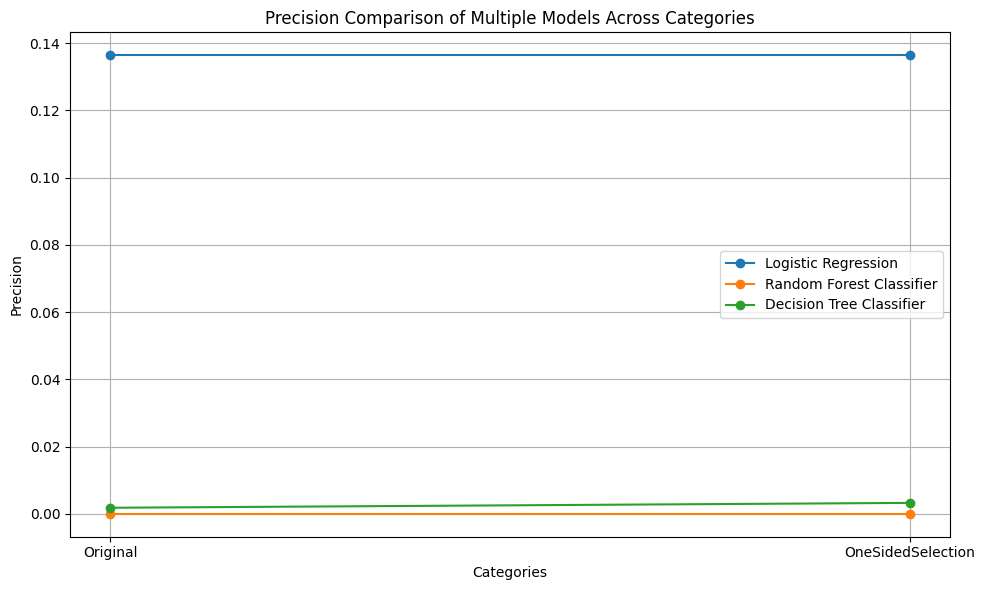

In [73]:
visualize_accuracy(precisions_2d, model_names, categories, type="Precision")

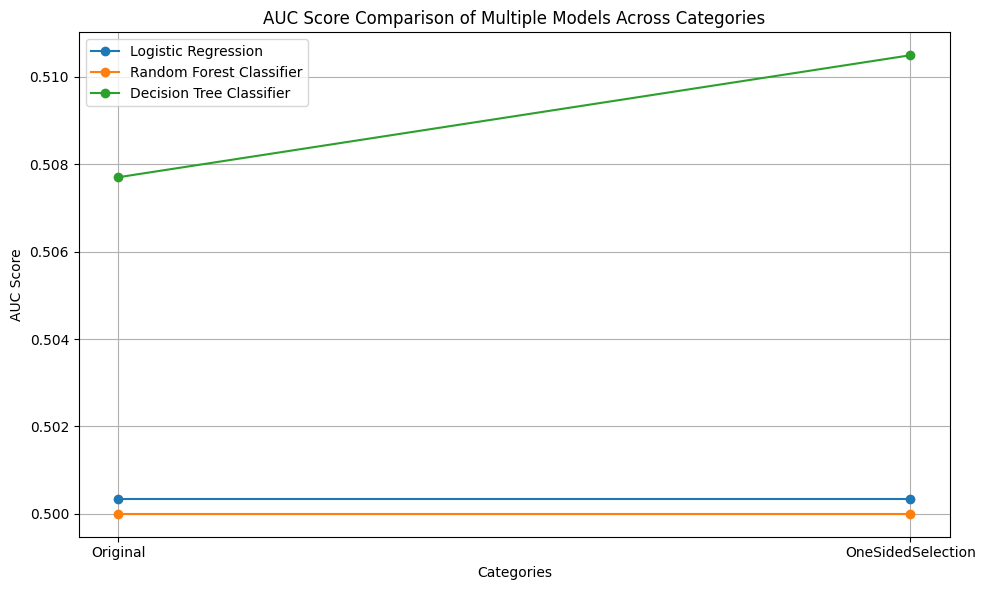

In [74]:
visualize_accuracy(auc_scores_2d, model_names, categories, type="AUC Score")

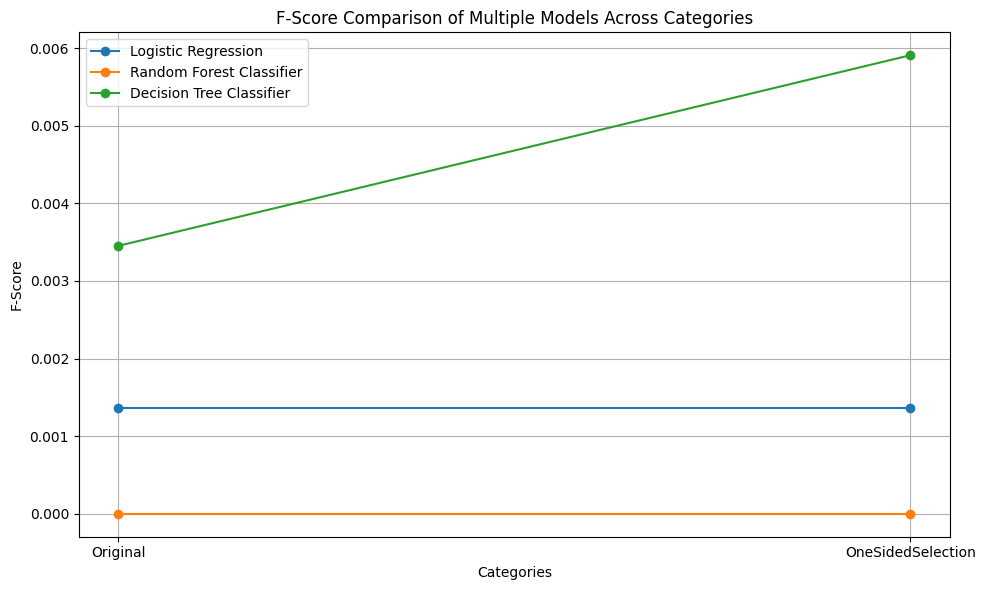

In [75]:
visualize_accuracy(f_scores_2d, model_names, categories, type="F-Score")

# Neural Network Part

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
# Importing torch
import torch
import torch.nn as nn
import torch.optim as optim

In [87]:
from torch.utils.data import DataLoader, TensorDataset

In [78]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [79]:
device

device(type='cuda')

In [80]:
# Define the neural network architecture
class ANN(nn.Module):
    def __init__(self, input_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Output layer with 2 classes (fraud, not fraud)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

In [81]:
scaler = StandardScaler()

In [82]:
auc_scores_nn=[]
precisions_nn=[]
f_scores_nn=[]

## Original

In [83]:
X_train = scaler.fit_transform(X_train_org)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train_org.values).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

In [88]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [89]:
batch_size = 32

In [90]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [91]:
# Initialize the ANN model
input_dim = X_train.shape[1]
model = ANN(input_dim)
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [92]:
num_epochs = 60
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [5/60], Loss: 0.0001
Epoch [10/60], Loss: 0.0002
Epoch [15/60], Loss: 0.0002
Epoch [20/60], Loss: 0.0023
Epoch [25/60], Loss: 0.0002
Epoch [30/60], Loss: 0.0004
Epoch [35/60], Loss: 0.0004
Epoch [40/60], Loss: 0.0001
Epoch [45/60], Loss: 0.0004
Epoch [50/60], Loss: 0.0002
Epoch [55/60], Loss: 0.0002
Epoch [60/60], Loss: 0.0005


In [93]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted.cpu().numpy())
    print(f'Accuracy on test set: {accuracy:.2f}')

    # Compute precision, recall, and AUC score
    print("Classification Report:")
    print(classification_report(y_test, predicted.cpu().numpy()))

    # Compute AUC score
    y_prob = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
    auc_score = roc_auc_score(y_test, y_prob)
    print(f'AUC Score: {auc_score:.2f}')

    precision = precision_score(y_test, predicted.cpu().numpy())
    f1score = f1_score(y_test, predicted.cpu().numpy())

    precisions_nn.append(precision)
    f_scores_nn.append(f1score)
    auc_scores_nn.append(auc_score)

Accuracy on test set: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96   3653647
           1       0.01      0.50      0.02      4388

    accuracy                           0.93   3658035
   macro avg       0.50      0.72      0.49   3658035
weighted avg       1.00      0.93      0.96   3658035

AUC Score: 0.80
